In [1]:
import matplotlib.pyplot as plt 
import torch 
import torch.nn as nn 
from torchvision import transforms 
import torch.optim as optim 
from dataset import AnimeDataset
from torch.utils.data import DataLoader
from utils.color import * 
from PIL import Image 
from model.deepunet import DeepUNet 
from model.patchgan import PatchGAN
from utils.preprocess import re_scale
from torchsummary import summary

In [2]:
my_transform = transforms.Compose([transforms.ToTensor(),])

train_dataset = AnimeDataset("./data/train/", None)
valid_dataset = AnimeDataset("./data/val/", None)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=True)

G = DeepUNet().to("cuda")
D = PatchGAN().to("cuda")
epochs = 15 
learning_rate = 2e-4
optimG = optim.Adam(G.parameters(), lr = learning_rate)
optimD = optim.Adam(D.parameters(), lr = learning_rate)

torch.Size([1, 3, 512, 512]) torch.Size([1, 3, 512, 512]) torch.Size([1, 12, 512, 512])


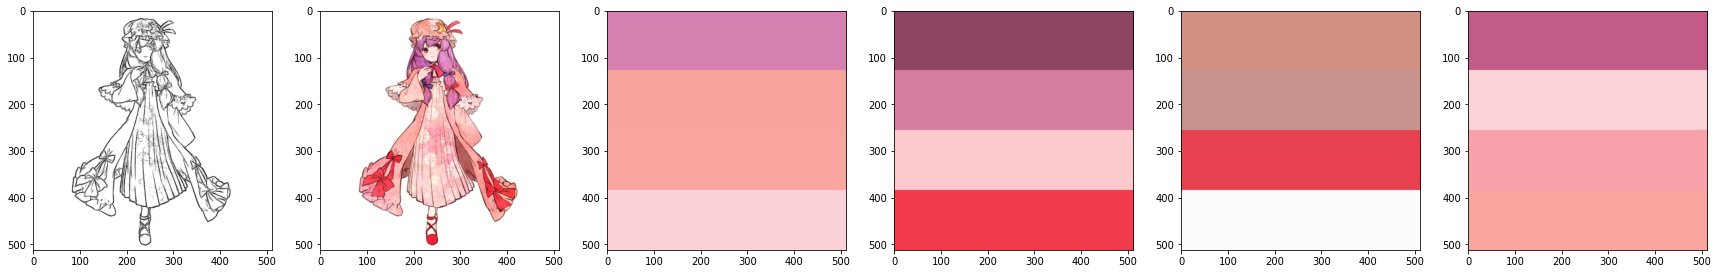

In [3]:
"""
Check dataset
"""
for (sketch, original, colors) in train_loader:
    print(sketch.shape, original.shape, colors.shape)
    s = re_scale(sketch[0]) * 255
    ori = re_scale(original[0]) * 255
    color = re_scale(colors[0]) * 255 
    s = s.to(torch.uint8)
    ori = ori.to(torch.uint8)
    color = color.to(torch.uint8)
    
    plt.figure(figsize = (30, 30))
    plt.subplot(1, 6, 1)
    s = s.permute(1, 2, 0)
    plt.imshow(s)
    
    plt.subplot(1, 6, 2)
    ori = ori.permute(1, 2, 0)
    plt.imshow(ori)
    
    plt.subplot(1, 6, 3)
    c = color[:3].permute(1, 2, 0)
    plt.imshow(c)

    plt.subplot(1, 6, 4)
    c = color[3:6].permute(1, 2, 0)
    plt.imshow(c)

    plt.subplot(1, 6, 5)
    c = color[6:9].permute(1, 2, 0)
    plt.imshow(c)

    plt.subplot(1, 6, 6)
    c = color[9:12].permute(1, 2, 0)
    plt.imshow(c)
    break

In [4]:
summary(G, [(3,512,512),(12,512,512)])

[INFO] after encoding  torch.Size([2, 512, 8, 8])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 512, 512]           8,704
       BatchNorm2d-2         [-1, 64, 512, 512]             128
            Conv2d-3        [-1, 128, 512, 512]          73,856
       BatchNorm2d-4        [-1, 128, 512, 512]             256
            Conv2d-5        [-1, 128, 512, 512]         147,584
       BatchNorm2d-6        [-1, 128, 512, 512]             256
            Conv2d-7        [-1, 128, 512, 512]           8,192
         MaxPool2d-8  [[-1, 128, 256, 256], [-1, 128, 256, 256]]               0
DeepUNetDownSample-9  [[-1, 128, 256, 256], [-1, 128, 512, 512], [-1, 128, 256, 256]]               0
           Conv2d-10        [-1, 256, 256, 256]         295,168
      BatchNorm2d-11        [-1, 256, 256, 256]             512
           Conv2d-12        [-1, 256, 256, 256]         590,08

In [4]:
"""
Start training GAN model 
"""
for epoch in range(1, epochs + 1):
    for (sketch, original, colors) in train_loader:
        sketch = sketch.to("cuda")
        original = original.to("cuda")
        colors = colors.to("cuda")
        
        fake = G(sketch, colors)
        print(fake.shape)
        break

[INFO] after encoding  torch.Size([1, 512, 8, 8])
torch.Size([1, 3, 512, 512])


RuntimeError: CUDA out of memory. Tried to allocate 128.00 MiB (GPU 0; 6.00 GiB total capacity; 4.36 GiB already allocated; 0 bytes free; 4.42 GiB reserved in total by PyTorch)